### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

### Dataset Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

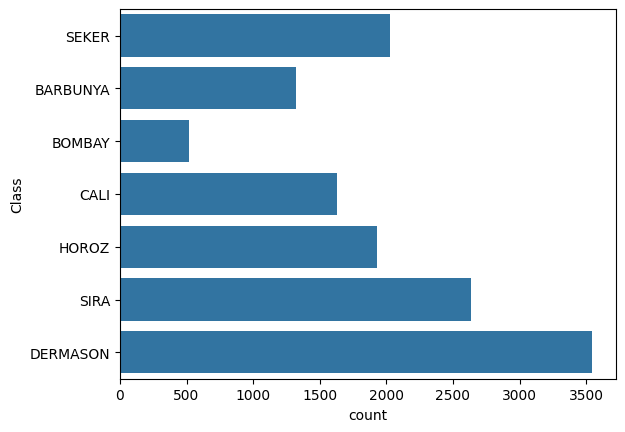

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [2]:
df = pd.read_csv("/home/alejandro/proyectos/platzi/ia/machine_learning/Logisticas/multiple/Dry_Bean.csv")
pd.set_option('display.max_columns', None)
print(df.info())
print()
print(df.describe()) 

# Class Distribution
sns.countplot(df.Class) # Few BOMBAY data, hence discarding data from other classes for better distribution
plt.show()

df.drop_duplicates(inplace=True)
print(df.isnull().sum())

### Preprocessing

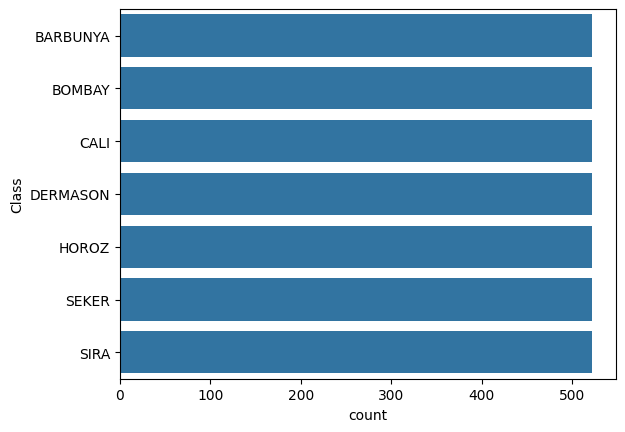

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


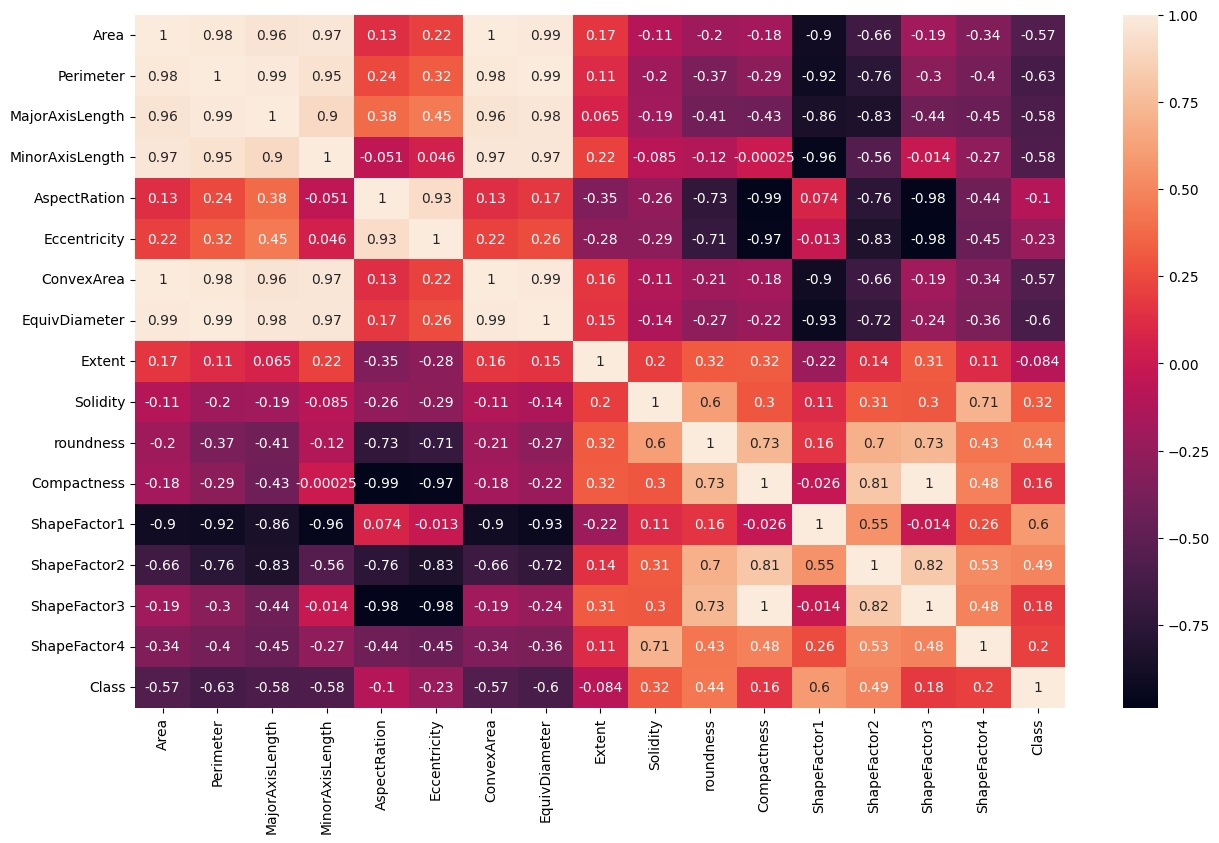

In [3]:
under_sampler = RandomUnderSampler(random_state=42)

x = df.drop(["Class"], axis=1)
y = df.Class

x_over, y_over = under_sampler.fit_resample(x, y)

# Verification
sns.countplot(y_over)
plt.show()

# Converting classes to numeric data

print(y_over.unique())
y_over.replace(["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"], [1,2,3,4,5,6,7], inplace=True)

df_over = x_over
df_over["Class"] = y_over

plt.figure(figsize=(15,9))
sns.heatmap(df_over.corr(), annot=True) # Discarding ConvexArea, EquivDiameter, and MajorAxisLength for being highly correlated with area
plt.show()

x_over.drop(["ConvexArea","EquivDiameter","MajorAxisLength"], axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, random_state=True, shuffle=True, test_size=0.2)

std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

### Training

[[114   0   0   0   0   0   0]
 [  0 115   0   0   0   0   0]
 [  0   0 105   0   0   0   0]
 [  0   0   0  98   0   0   0]
 [  0   0   0   2  97   0   0]
 [  0   0   0   0   0 104   0]
 [  0   0   0   0   0   0  96]]
0.9972640218878249


/home/alejandro/proyectos/platzi/ia/ia-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/alejandro/proyectos/platzi/ia/ia-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn(
/home/alejandro/proyectos/platzi/ia/ia-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/alejandro/proyectos/platzi/ia/ia-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/alejandro/proyectos/platzi/ia/ia-env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

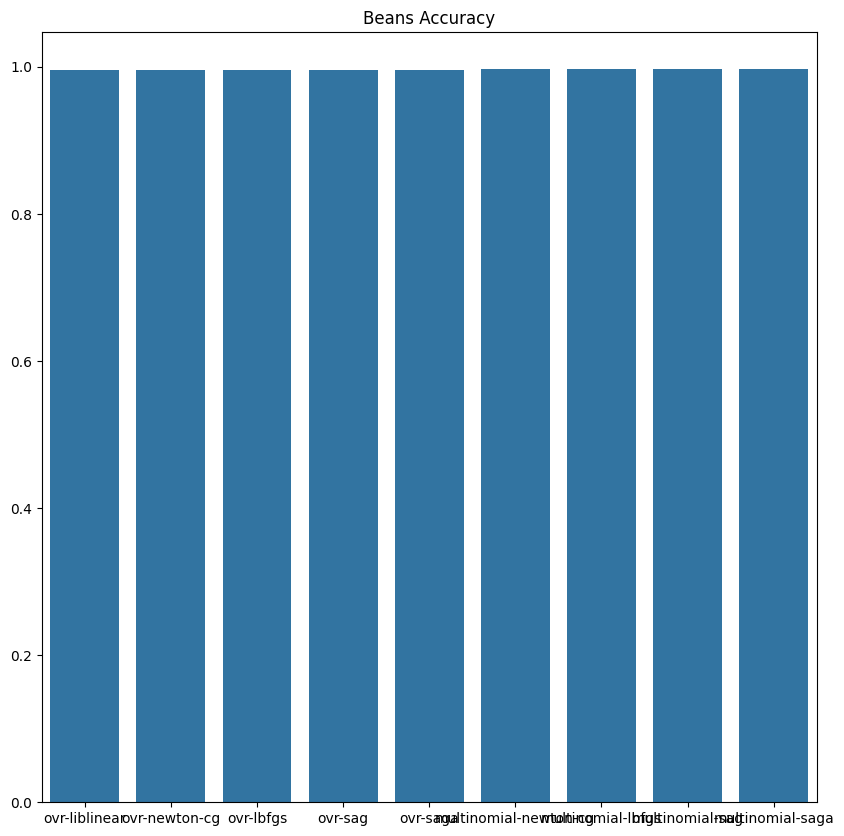

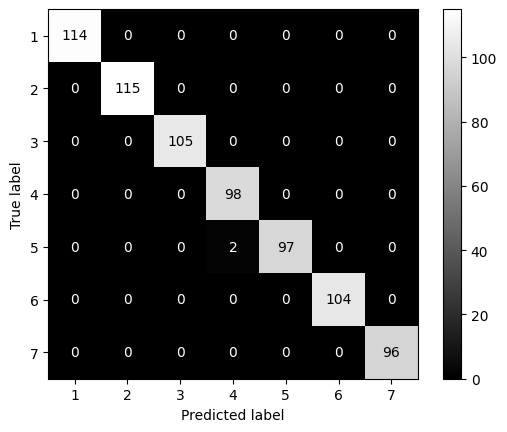

In [4]:
# Logistic model function
def logistic_model(C_, solver_, multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver=solver_, multi_class=multiclass_, n_jobs=-1, C=C_)
    return logistic_regression_model

# Function call
model = logistic_model(1,'saga','multinomial')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

# Iterative function call to test all parameters
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1, j, i)
            model.fit(x_train, y_train)
            predictions = model.predict(x_test)
            params.append(i + '-' + j)
            accuracy = accuracy_score(y_test, predictions)
            scores.append(accuracy)
        except:
            None    

# Performance plot
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=0)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()